## Density Models Assignment

In [1]:
# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

#import numpy
import numpy as np

# from sklearn import make_blobs
from sklearn.datasets import make_blobs

# import DBSCAN
from sklearn.cluster import DBSCAN

## Task: Generate clusters with make_blobs function 

Use the following settings:
   * n_samples=150,
   * n_features=2,
   * centers=3,
   * cluster_std=0.6,
   * random_state=0

In [2]:
X, y = make_blobs(n_samples=150,
                  n_features=2, 
                  centers=3,
                  cluster_std=0.6,
                  random_state=0)

* plot data points

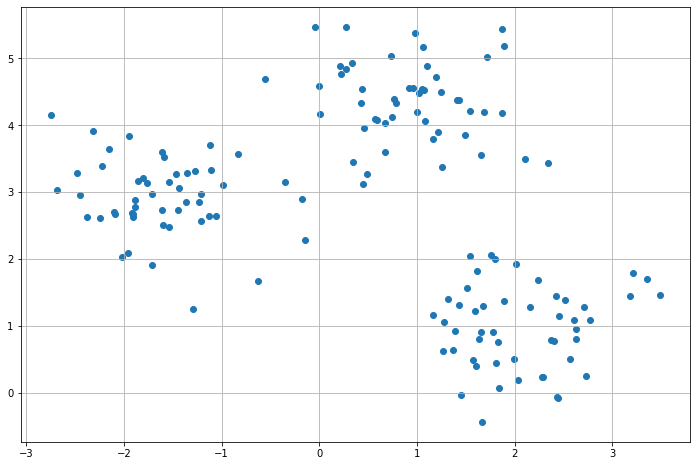

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.grid()

* define function plot_clusters

In [4]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

## Objective: 
Try to find optimal settings of `eps` and `min_samples` params of DBSCAN. You can iterate over multiple parameters combinations and plot the clustering results.

* define params space: two lists with `eps` and `min_samples` respectively

In [11]:
eps = [0.2,0.5,0.8]
min_samples = [3,5]

* combinations (hint: use 'product' function from 'itertools')

In [12]:
from itertools import product 

combinations = list(product(eps, min_samples))

- fit DBSCAN for each combinations and plot the results

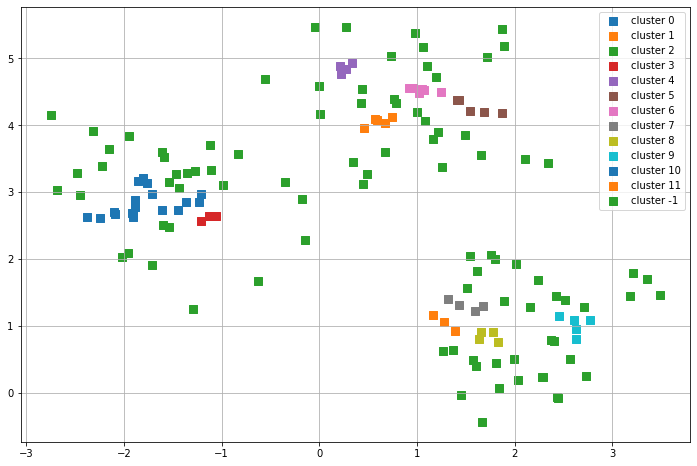

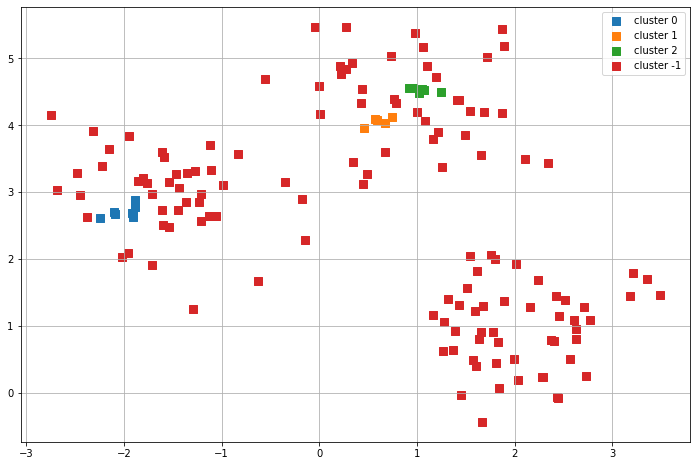

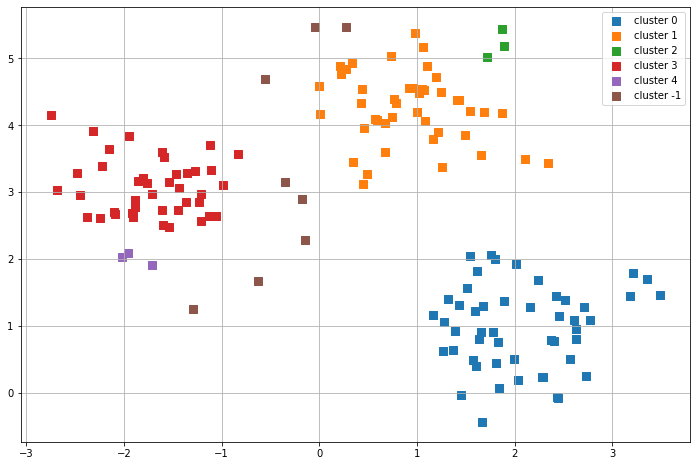

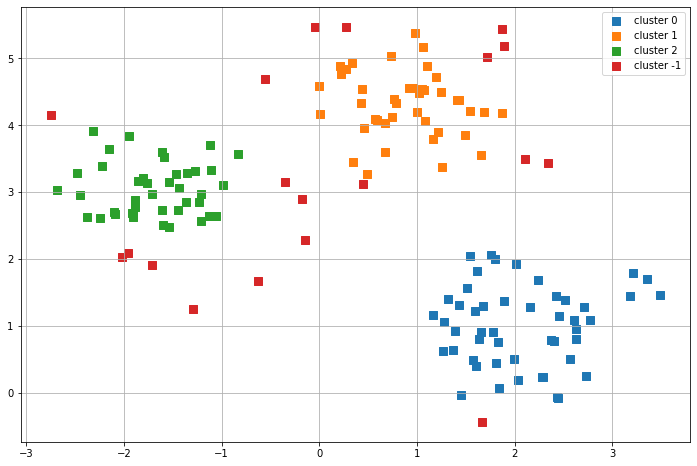

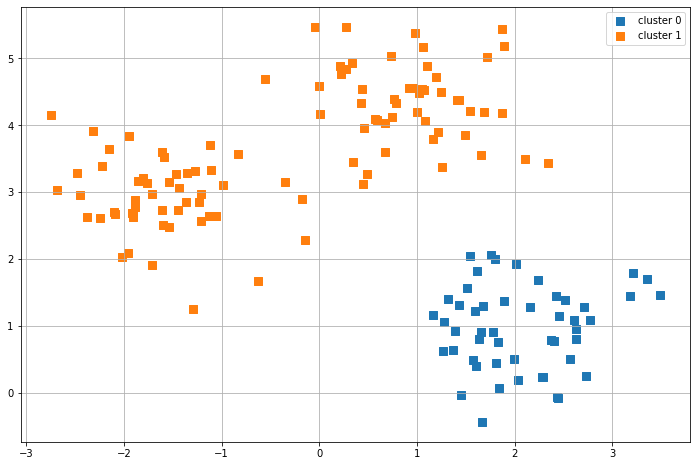

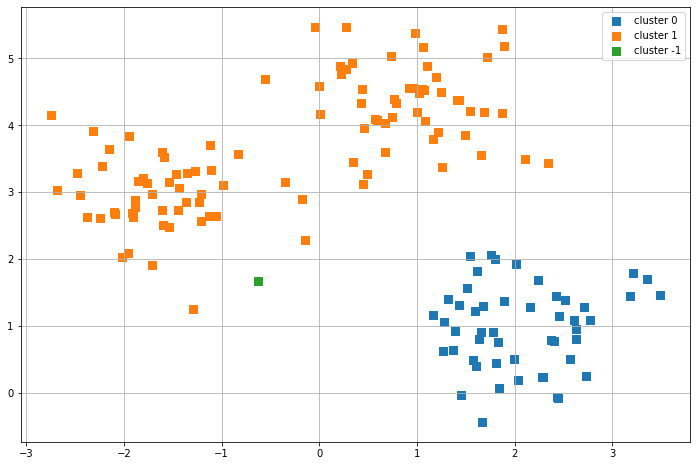

In [13]:
for eps, min_samples in combinations:
    
    db = DBSCAN(eps=eps,
            min_samples=min_samples,
            metric='euclidean')
    y_db = db.fit_predict(X)
    plot_clusters(X,y_db)